## Ejercicio 1

### GCL

Debemos hacer un Generador Lineal Congruente con ciertos parámetros.

+ semilla: La parte entera del promedio de los padrones del grupo
+ multiplicador: 1013904223
+ incremento: 1664525
+ módulo: 2 ** 32

In [4]:
def glc(start, a, c, m, upto):
    prev = start
    for _ in range(upto):
        new = (a * prev + c) % m
        yield new
        prev = new

In [5]:
start = (100017 + 101055 + 97112 + 95457) / 4
mult = 1013904223
inc = 1664525
m = 2**32

l = []
for n in glc(start, mult, inc, m, 10):
    l.append(n)

print(f"Los 10 primeros resultados son: \n\n{l}")

Los 10 primeros resultados son: 

[2184472634.75, 2663012352.0, 2563247616.0, 2610993152.0, 2163854848.0, 2136397824.0, 2153483776.0, 2380077056.0, 3538767360.0, 187914240.0]


### GCL Uniforme [0, 1]

Para lograr que la sencuencia que nos devuelva gcl sea uniforme en el intervalo `[0, 1]`, hay que modificar lo que va devolviendo la función.

Al hacer `mod m` dentro del gcl, sabemos que los resultados que van a salir son números uniformes en el intervalo `[0, m-1]`. Por lo tanto, lo que necesitamos hacer es _mover_ el intervalo al `[0, 1]`.

Sea: 

`X ~ U(0, m-1)`
  
  
`Y = X / m`
  
Entonces:
  
`Y ~ U(0, 1)`

In [6]:
def glc_uniforme(start, a, c, m, upto):
    for x in glc(start, a, c, m, upto):
        y = x / m
        yield  y

m = 1000
h = [n for n in glc_uniforme(start, mult, inc, m, 100000)]

In [8]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.hist(h, bins=10, range=(0, 1))

(array([11000.,  9000., 11000.,  9000., 11000.,  9000., 11000.,  9000.,
        11000.,  9000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

## Ejercicio 2



In [9]:
import numpy as np

def my_density_func(t):
  l = 1/15
  if t < 0:
    raise Exception
  if t < 10:
    return 1/25
  return 3/5 * l * np.exp(-l * (t - 10))

In [10]:
my_density_func(10)

0.04

### Graficar la función de densidad

In [11]:
x = list(np.arange(0, 100))
y = list(map(my_density_func, x))

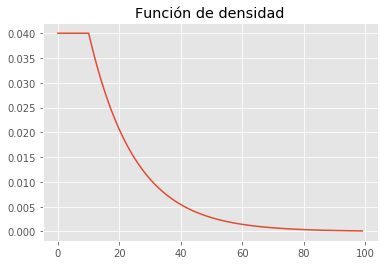

In [12]:
from matplotlib import pyplot as plt

plt.plot(x, y)
plt.title("Función de densidad")
plt.show()

### Graficar la función de probabilidad acumulada

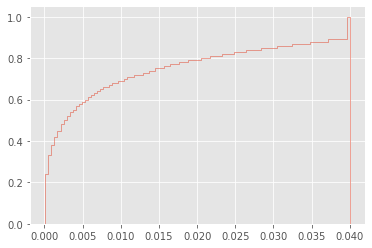

In [13]:
points = 100
x = list(np.arange(0, points))
y = list(map(my_density_func, x))
n, bins, a = plt.hist(
    y, cumulative=1, bins=points, density=True, histtype='step'
)

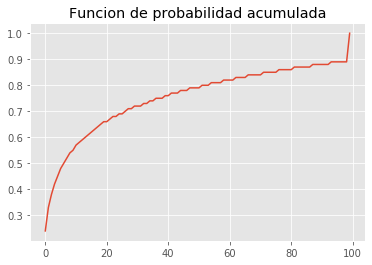

In [14]:
plt.plot(x, n)
plt.title("Funcion de probabilidad acumulada")
plt.show()

### Graficar la función de probabilidad acumulada inversa

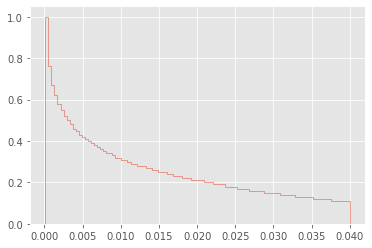

In [15]:
points = 100
x = list(np.arange(0, points))
y = list(map(my_density_func, x))
n, bins, a = plt.hist(
    y, cumulative=-1, bins=points, density=True, histtype='step'
)

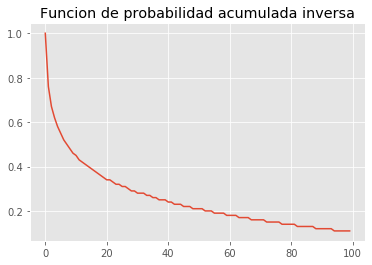

In [16]:
plt.plot(x, n)
plt.title('Funcion de probabilidad acumulada inversa')
plt.show()

### Utilizando el generador de números aleatorios con distribución uniforme [0,1] implementado en el ejercicio 1 y aplicando el método de la transformada inversa genere 100.000 números pseudoaleatorios.

In [17]:
import math
def f_acum_inversa (u):
    if u < 2/5:
        return 25*u
    return 10-15*(math.log((5/3)-(5/3)*u))

start = (100017 + 101055 + 97112 + 95457) / 4
mult = 1013904223
inc = 1664525
m = 2**32

randomUniformNumbers = [n for n in glc_uniforme(start, mult, inc, m, 100000)]

results = [f_acum_inversa(u) for u in randomUniformNumbers]

### Realizar un histograma con los valores obtenidos en el punto anterior.

(array([5.7648e+04, 2.6756e+04, 1.0092e+04, 3.4200e+03, 1.3970e+03,
        4.3200e+02, 1.0200e+02, 9.1000e+01, 5.2000e+01, 1.0000e+01]),
 array([6.25848770e-04, 1.53524558e+01, 3.07042857e+01, 4.60561157e+01,
        6.14079456e+01, 7.67597756e+01, 9.21116055e+01, 1.07463435e+02,
        1.22815265e+02, 1.38167095e+02, 1.53518925e+02]),
 <a list of 10 Patch objects>)

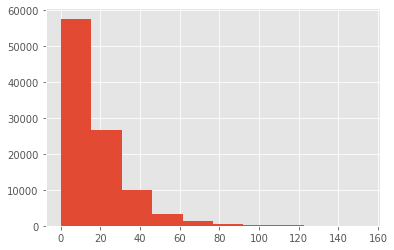

In [18]:
plt.style.use('ggplot')
plt.hist(results)

## Ejercicio 3
**Aplicando el algoritmo de Aceptación y rechazo se pide:**

**a) Generar 100.000 número aleatorios con distribución Normal de media 15 y desvío estándar 3**
Para cumplir el objetivo dado generamos una normal estandard $F_X(t)$ que luego desplazamos y expandimos para obtener una normal de media 15 y desvío 3. El planteo fue generar los valores positivos de $$F_X(t)$$ y luego multiplicar la mitad de ellos por $-1$, obteniendo la generación del resto de la curva. Para ello proponemos una distribución exponencial $F_Y(t)$ con $\lambda = 1$, mientras que queremos generar $F_X(t)$ que es la distribución normal estándar tal que:
$$F_Y(t) = e^{-y} \mathbb{1} \{0 < t < \infty\}$$
$$F_X(t) = \frac{e^{\frac{-x^2}{2}}}{\sqrt{2\pi}} \mathbb{1} \{0 < t < \infty\}$$

1. Econtramos una cota superior $c$, tal que, $c >= F_X(t)/F_Y(t)$ y llegamos a $c = 0.65$
2. Luego, sabiendo el valor de $c$, generamos un número al azar de $F_Y(t)$ con $t$ generado por `exp_glc(lambda)` que lo llamaremos $n$
3. Generamos un número al azar entre $0$ y $1$ que lo llamaremos $r$
4. Si $r <= p(t) = \frac{F_X(a)}{c*F_Y(a)}$ entonces a es el valor generado, sino volvemos a 2

In [53]:
import random
import math
import numpy as np

N = 100000
c = 0.65

def exp_glc(lamda=1):
  return [-math.log(np.random.rand()) / lamda for n in range(N*2)]
  
def fy(y):
  return math.exp(-y)

def fx(x):
  return math.exp(-(x)**2/2) / math.sqrt(2*math.pi)

def p(t):
  return fx(t)/(c*fy(t))

# Paso 1: Generamos muestras de la variable exponencial Y, media 1
def acc_rej(mu, var):
  t = exp_glc()
  z = []
  malos = []
  for n in t:
    r = np.random.rand()
    if r < p(n): # acepto t(n) con prob. p(n)
      r2 = np.random.rand()
      sign = 1 if r2 < 0.5 else -1 # con prob 0.5 lo dejo positivo, sino neg
      z.append(sign * n * var + mu)
      
  return z

z = acc_rej(15, 3)
muestra_10 = z[:10000]
muestras = (N*2)
aceptadas = len(z)
# me quedo con los N que fueron pedidos
z = z[0:N]

### **b)** Realizar un histograma de frecuencias relativas con todos los valores obtenidos.

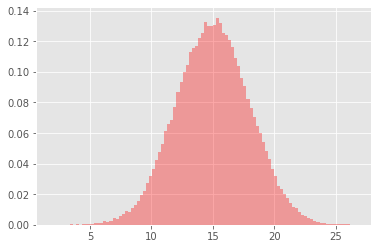

In [20]:
valores = np.array(z)
rango = (valores.max() - valores.min()) / (1+np.log2(valores.shape[0])) 
cant_divisiones = (valores.max() - valores.min()) / rango
cant_divisiones = 100
plt.hist(valores, bins=int(cant_divisiones), color='#ff000055', density=True)

plt.show()

### **c)** Comparar, en el mismo gráfico, el histograma realizado en el punto anterior con la función de densidad de probabilidad brindada por Matlab, Octave o Python

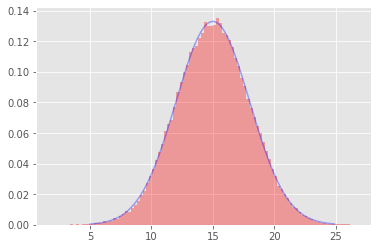

In [21]:
import scipy.stats as sp
valores = np.array(z)
plt.hist(valores, bins=int(cant_divisiones), color='#ff000055', density=True)

normal_control_group_x = np.arange(5,25,0.1)
normal_control_group_y = sp.norm.pdf(normal_control_group_x,15,3)
a = normal_control_group_y
plt.plot(normal_control_group_x, normal_control_group_y,color='#0000ff55')
plt.show()

### **d)** Calcular la media y la varianza de la distribución obtenida y compararlos con los valores teóricos.

In [22]:
u = np.mean(valores)
var = np.var(valores)
print(f"La muestra obtenida por aceptación y rechazo tiene una media: {u} y una varianza: {var}")

La muestra obtenida por aceptación y rechazo tiene una media: 15.009430100216752 y una varianza: 8.992539700218675


### **e)** Calcule el factor de rendimiento del método.

In [23]:
print("Rendimiento = %{}".format(aceptadas/muestras * 100))

Rendimiento = %76.813


## Ejercicio 4

### Utilizando 2 generadores de números al azar con distribuciones uniformes en [0,1] genere números aleatorios con distribución uniforme en el cuadrado.



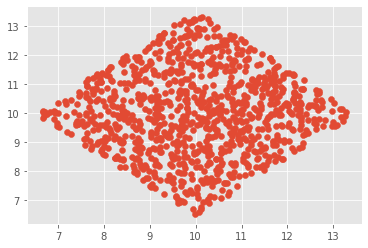

In [24]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
 
def tl_uniforme():
    sign =(random.uniform(0,1))
    rand = (random.random())
    if sign >= 0.5:
        rand*=2.5
    else:
        rand*=-2.5
    return rand
 
def transformacion_lineal(u,v):
    x = u*tl_uniforme() + 5
    y = v*tl_uniforme() + 5
    result = x+y
    return (result[0], result[1])
 
u= np.array([1.0/math.sqrt(2), 1.0/math.sqrt(2)])
v= np.array([-1.0/math.sqrt(2), 1.0/math.sqrt(2)])

values_x = []
values_y = []

for i in range(1000):
    x,y=transformacion_lineal(u,v)
    values_x.append(x)
    values_y.append(y)
    
plt.scatter(values_x,values_y)
plt.show()

## Ejercicio 5 
### Utilizando el método de Box-Muller para generar número aleatorio con distribución normal standard, se pide: 

### a) Generar 100.000 pares de números aleatorios (100.000 para cada una de las 2 normales que podemos generar).

In [25]:
def box_muller (u1, u2):
    z1 = math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
    z2 = math.sqrt(-2*math.log(u1))*math.sin(2*math.pi*u2)
    return z1, z2

lista1 = []
lista2 = []
for i in range(100000):
    u1 = random.uniform(0,1)
    u2 = random.uniform(0,1)
    z1, z2 = box_muller(u1, u2)
    lista1.append(z1)
    lista2.append(z2)

### b) Realizar un histograma para cada una de las 2 normales. 

####  Comparar, en el mismo gráfico, el histograma realizado en el punto anterior con la función de densidad de probabilidad brindada por Matlab, Octave o Python (para esta última distribución utilizar un gráfico de línea). 



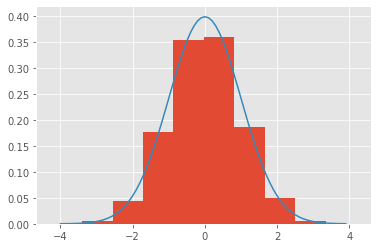

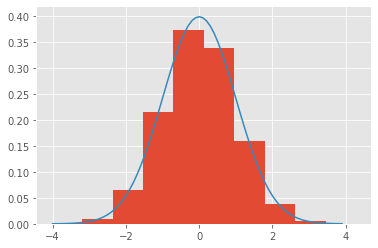

In [26]:
import scipy.stats as sp

plt.hist(lista1, density=True)

x = np.arange(-4,4,0.1)
y = sp.norm.pdf(x,0,1)

plt.plot(x, y)
plt.show()

plt.hist(lista2, density=True)

x = np.arange(-4,4,0.1)
y = sp.norm.pdf(x,0,1)

plt.plot(x, y)
plt.show()

####  Calcular la media y varianza de la distribución obtenida y compararlos con los valores teóricos.

In [27]:
#Dado que es una normal estandar, su media es 0 y su varianza es 1.

#Deben dar cercanos a 0
mean1 = np.mean(lista1) #mean1 = 0.002037213433174277
mean2 = np.mean(lista2) #mean2 = 0.00016174727106053538

#Deben dar cercanos a 1
var1 = np.var(lista1) #var1 = 0.9958656835425413
var2 = np.var(lista2) #var2 = 1.003160701813444

# Ejercicio 6
**Dada una función de probabilidad empírica:**
**$$p(a) = 0.1$$**
**$$p(b) = 0.5$$**
**$$p(c) = 0.3$$**
**$$p(d) = 0.1$$**
**Aplicar el método de la transformada inversa para generar 100.000 números que siguen esta distribución, dados 100.000 números uniformemente generados.**

Para ello debemos ver la función de probabilidad acumulada y luego separar en "secciones" donde se mappearan los valores uniformes $[0, 1]$ a los valores $[A; B; C; D]$.
$$P(A) = 0.1$$
$$P(B) = 0.6$$
$$P(C) = 0.9$$
$$P(D) = 1.0$$
Entonces los límites para `transformacion(x)` con `x` $\epsilon [0.0, 0.1)$ es:
$$[0.0, 0.1) -> A$$
$$[0.1, 0.6) -> B$$
$$[0.6, 0.9) -> C$$
$$[0.9, 1.0] -> D$$

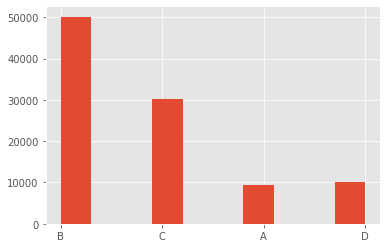

In [28]:
import matplotlib.pyplot as plt

start = (100017 + 101055 + 97112 + 95457) / 4
mult = 1013904223
inc = 1664525
m = 2**32

uniformes = [n for n in glc_uniforme(start, mult, inc, m, 100000)]

def transformar(num):
  if num < 0.1: return "A"
  if num < 0.6: return "B"
  if num < 0.9: return "C"
  return "D"

transformados = list(map(transformar, uniformes))

plt.style.use('ggplot')
plt.hist(transformados)
plt.show()

## Ejercicio 7
#### Realizar, sólo gráficamente,un test espectral en 2 y 3 dimensiones al generador congruencial lineal implementado en el ejercicio 1. 
Para realizar un test espectral de **2 dimensiones** del generador congruencial lineal implementado en el ejercicio 1 seguiremos una serie de pasos:
- Generar una muestra de tamaño n ($10.000$).


In [29]:
n = 100000 #tamaño de la muestra
start = (100017 + 101055 + 97112 + 95457) / 4
mult = 1013904223
inc = 1664525
m = 2**32

uniform_random_sample = [n for n in glc_uniforme(start, mult, inc, m, n)]

- Agrupar los elementos de a pares. Para agruparlos se recorta la lista en el máximo tamaño posible multiplo de 2, se toman los elementos con indice par por un lado y por otro solo los de indice impar, preservando el orden

In [30]:
maximum_2_multiple = (int(n / 2) * 2)
cut_list = uniform_random_sample[:maximum_2_multiple]
uniform_random_sample_x = cut_list[0::2]
uniform_random_sample_y = cut_list[1::2]

- Pasar a la función graficadora la primera y la segunda lista, las cuales serán utilizadas como valores $x$ e $y$ de los puntos, respectivamente.

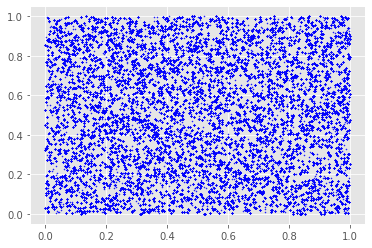

In [31]:
plt.plot(uniform_random_sample_x, uniform_random_sample_y, 'bo', markersize=0.5)
plt.show()

Despues de hacer zoom en los 2 ejes, no se observa ningún patrón que indique alguna deficiencia en el GNL.

Para realizar un test espectral de **3 dimensiones** del generador congruencial lineal implementado en el ejercicio 1 seguiremos una serie de pasos:
- Tomar la misma muestra que en el test anterior.
- Separar en ternas de forma análoga a los pares del test anterior.

In [32]:
from mpl_toolkits.mplot3d import Axes3D
maximum_3_multiple = (int(n / 3) * 3)
cut_list = uniform_random_sample[:maximum_3_multiple] 
uniform_random_sample_x = cut_list[0::3]
uniform_random_sample_y = cut_list[1::3]
uniform_random_sample_z = cut_list[2::3]

- Pasar a la función graficadora la primera, segunda y tercer lista, las cuales serán utilizadas como valores $x$, $y$, $z$ de los puntos, respectivamente.

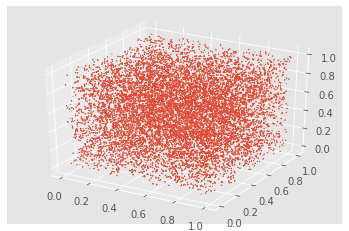

In [33]:
ax = plt.subplot(111, projection='3d')
ax.scatter(uniform_random_sample_x, uniform_random_sample_y, uniform_random_sample_z, s=0.5)
plt.show()

Despues de hacer zoom en los 3 ejes, no se observa ningún patrón que indique alguna deficiencia en el GNL.

# Ejercicio 8

### Consiste en aplicar un _gap test_ a los números generados por el GLC hecho en el ejercicio 1, donde los valores del test son [0.3, 0.6].

### Esto consiste en contar la cantidad de números de _gap_ que hay entre el primer número perteneciente al intervalo y el segundo perteneciente al intervalo.


In [34]:
import numpy as np
n = 100000 #tam de la muestra
start = (100017 + 101055 + 97112 + 95457) / 4
mult = 1013904223
inc = 1664525
m = 2**32

muestra = [n for n in glc_uniforme(start, mult, inc, m, n)]

def get_gaps(numbers, alpha, beta):
  pos = 0
  results = np.zeros(len(numbers))
  in_gap = False
  for num in numbers:
    if (num >= alpha and num <= beta):
      if in_gap:
        results[pos] += 1
        in_gap = False
      else:
        in_gap = True
      pos = 0
    elif in_gap:
      pos += 1
  return results

# obtenemos las apariciones para cada gap
gaps_observadas = get_gaps(muestra, 0.3, 0.6)

# usamos hasta gaps de 30
# k = 20
k = 20
p = 0.3  # prob de caer en intervalo
cant_experimentos = k
gaps_observadas = gaps_observadas[:k]

prob_de_caer_en_gap = np.zeros(k)
prob_de_caer_en_gap[0] = 0.6 - 0.3 # beta - alfa

  
# calculo la probabilidad de tener un gap de k numeros: pk = ((1-p)**k) * p
# donde p es la probabilidad de caer en el intervalo [alpha, beta]
for i in range(1, k):
  prob_de_caer_en_gap[i] = ((1 - p) ** i) * p
prob_de_caer_en_gap

array([0.3       , 0.21      , 0.147     , 0.1029    , 0.07203   ,
       0.050421  , 0.0352947 , 0.02470629, 0.0172944 , 0.01210608,
       0.00847426, 0.00593198, 0.00415239, 0.00290667, 0.00203467,
       0.00142427, 0.00099699, 0.00069789, 0.00048852, 0.00034197])

### Luego de obtener el valor para cada gap, debemos hacer un test Chi cuadrado.

In [35]:
from scipy import stats as stats

grados_de_libertad = 0.01
observados = gaps_observadas
esperados = prob_de_caer_en_gap * sum(gaps_observadas)

print(observados)
print(esperados)

s, p = stats.chisquare(observados, f_exp=esperados)

print(f's: {s} \np: {p}\n')

if 1 - p < grados_de_libertad:
  print('H0 es aceptada')
else:
  print('H0 es rechazada')
  

[4327. 3348. 2283. 1534. 1074.  678.  536.  390.  297.  123.  123.  114.
   85.   28.   35.   31.    0.   23.    5.    5.]
[4511.7        3158.19       2210.733      1547.5131     1083.25917
  758.281419    530.7969933   371.55789531  260.09052672  182.0633687
  127.44435809   89.21105066   62.44773546   43.71341483   30.59939038
   21.41957326   14.99370129   10.4955909     7.34691363    5.14283954]
s: 111.79209509558258 
p: 3.722678710959152e-15

H0 es rechazada


####Tanto con 0.1 como con 0.5 grados de libertad, la hipótesis de que los numeros estan distribuidos uniformemente, es rechazada.

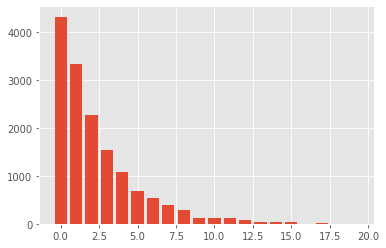

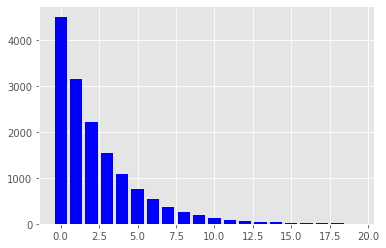

In [36]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.bar(list(range(len(gaps_observadas))), gaps_observadas)
plt.show()
plt.bar(list(range(len(gaps_observadas))), esperados, color="blue")
plt.show()

## Ejercicio 9
**Realizar un test Chi2 a la distribución empírica implementada en el Ej 6, y analizar el resultado indicando si la distribución puede o no ser aceptada. Considerar un nivel de significación del 1%.  En caso que la distribución de probabilidades no pase el test con un nivel de significación del 1%  volver a realizarlo con  un nivel de significación del 5%.**

En primer lugar, generamos una muestra a partir de la distribucción definida en el ejercicio 6.

In [ ]:
from scipy import stats as stats
import matplotlib.mlab as mlab
n = 100000 #tam de la muestra
start = (100017 + 101055 + 97112 + 95457) / 4
mult = 1013904223
inc = 1664525
m = 2**32

ej1_values = [n for n in glc_uniforme(start, mult, inc, m, n)]
discrete_values = [transformar(num) for num in ej1_values]

De esta muestra medimos la dispersión de las ocurrencias observadas ($N_i$).

In [ ]:
values = ['A', 'B', 'C', 'D']
frecs = []
for i in range(4):
  frecs.append(0)
  for value in discrete_values:
    if value == values[i]:
      frecs[i] += 1

Además definimos cuáles eran las ocurrencuas esperadas de la distribución teórica ($np_i$).

In [40]:
expected_values =  [0.1*100000,0.5*100000,0.3*100000,0.1*100000]

Luego calculamos el estadístico $D^2$ y junto con el nivel de significatividad (`ns`) determinamos si se rechaza la hipótesis nula o no.

In [42]:
def chiCuadrTest(f_obs, f_exp, ns):
  (s,p) = stats.chisquare(f_obs, f_exp = f_exp)
  #print(f"Con un nivel de significacion de {ns} ", end='')
  print(f"p-value = {p}")
  if p < ns:
    print(f"{p} < {ns}")
    print("Rechazo H0")
  else:
    print(f"{p} > {ns}")
    print("Aceto H0")
ns = 0.01
chiCuadrTest(frecs, expected_values, ns)
ns = 0.05
chiCuadrTest(frecs, expected_values, ns)

p-value = 4.011327428737019e-06
4.011327428737019e-06 < 0.01
Rechazo H0
p-value = 4.011327428737019e-06
4.011327428737019e-06 < 0.05
Rechazo H0


Como se puede ver en la salida, p-value toma un valor de $4.011327428737019 * 10^{-6}$  que es menor que el nivel de significación tanto para $0.01$ como para $0.05$ por ende en ambos casos rechazo $H_0$

# Ejercicio 10
**Aplicar el test de Kolmogorov-Smirnov al generador de números al azar con distribución normal generado en el ejercicio 3. Analizar el resultado del mismo, e indicar si la distribución puede o no ser aceptada. Considerar un nivel de significación del 1%.  En caso que la distribución de probabilidades no pase el test con un nivel de significación del 1%  volver a realizarlo con  un nivel de significación del 5%.**

En primer lugar usamos las $10.000$ observaciones ${x_1, x_2, ..., x_N}$ (almacenadas en `muestra_10`) de una variable continua $X$ con el generador de números al azar con distribución normal generado en el ejercicio 3 (`acc_rej()`). 

In [45]:
muestra = muestra_10

Una vez conseguida esta muestra la utilizadamos para obtener una aproximación empírica a la función acumulaiva.
$$F(x) \approx \hat{F} = \frac{\#x_i \leq x} n$$

In [54]:
from scipy.stats import norm
def cdf_muestras(x,muestras):
   resultado = 0
   for i in muestras:
       if i <= x:
           resultado+=1
   return resultado/ len(muestras)

empirical_normal_values = [cdf_muestras(i,muestra) for i in muestra]
theoretical_normal_values = [ norm.cdf(empirical_normal_values[i]) for i in range(len(muestra)) ]
 

A continuación medimos la distancia a la distribución real:
$$q = max_x| \hat{F}-F(x)|$$

In [55]:
d_plus = [ empirical_normal_values[i] - theoretical_normal_values[i]  for i in range(N-1) ]
d_minus = [ theoretical_normal_values[i] - empirical_normal_values[i]  for i in range(N-1) ]

d = max(d_plus) if max(d_plus) > max(d_minus) else max(d_minus)
print(d) 

# 0.4999605579290055

#El resultado debe ser menor al nivel de significancia.

# Con un nivel de significacion del 1%, no pasa el test.

# Con un nivel de significacion del 5%, pasa.

0.4999960883154063


Para finalizar, se acepta la hipótesis $H_0$ si:
$$q > \sqrt{-\frac{1}{2n}ln(\frac{\alpha}{2})}$$

Entonces, con una significacion del %$1$:
$$0.4999605579290055 > \sqrt{-\frac{1}{2*10000}ln(\frac{0.01}{2})}$$
$$0.4999605579290055 > 0.05146997846$$
Aceptamos $H_0$